
### Predicting CO₂ Emissions Using Regression Analysis

#### Objective
To build and evaluate a regression model that predicts CO₂ emissions of vehicles based on relevant features.



#### Dataset
CO₂ Emission by Vehicles dataset: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles/data



#### Requirements
- Python (Latest Version)
- Jupyter Notebook
- Libraries: pandas, numpy, matplotlib, seaborn, scikit-learn



In [1]:

# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
import seaborn as sns


In [2]:

# Step 2: Load Dataset
 # Update with correct file path
df = pd.read_csv("CO2 Emissions.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244



#### Step 3: Data Inspection


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.describe()



,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [5]:
# Check for missing values

df.isnull().sum()


Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:

# Step 4: Exploratory Data Analysis (EDA)



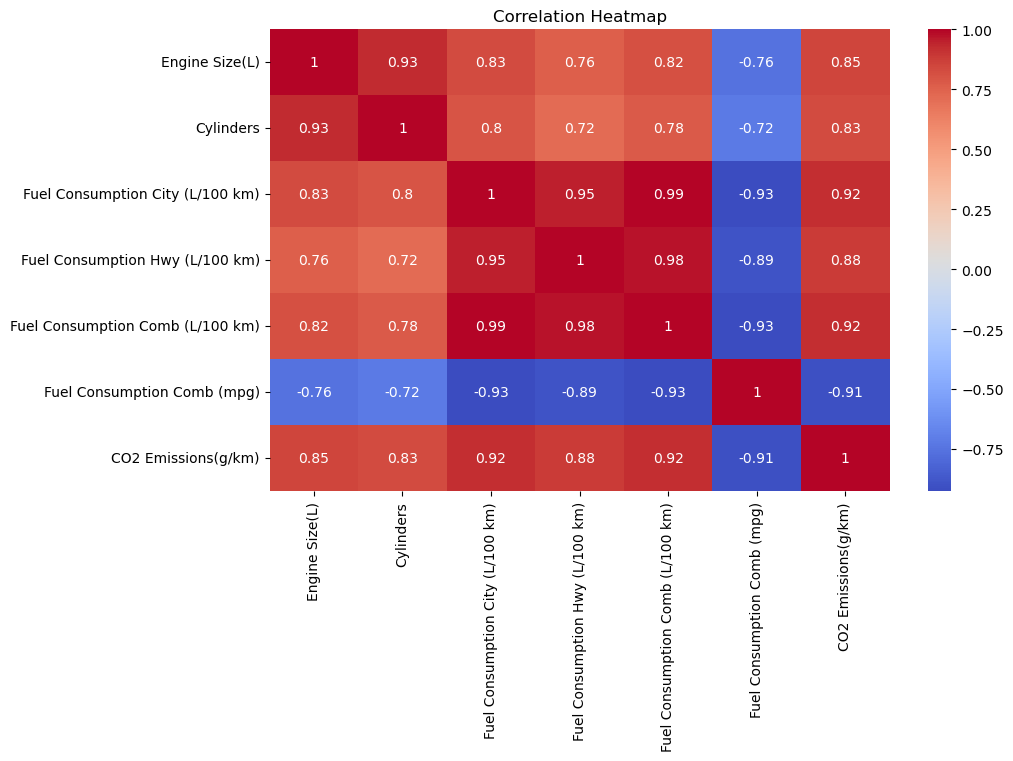

In [7]:
plt.figure(figsize=(10,6)),
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

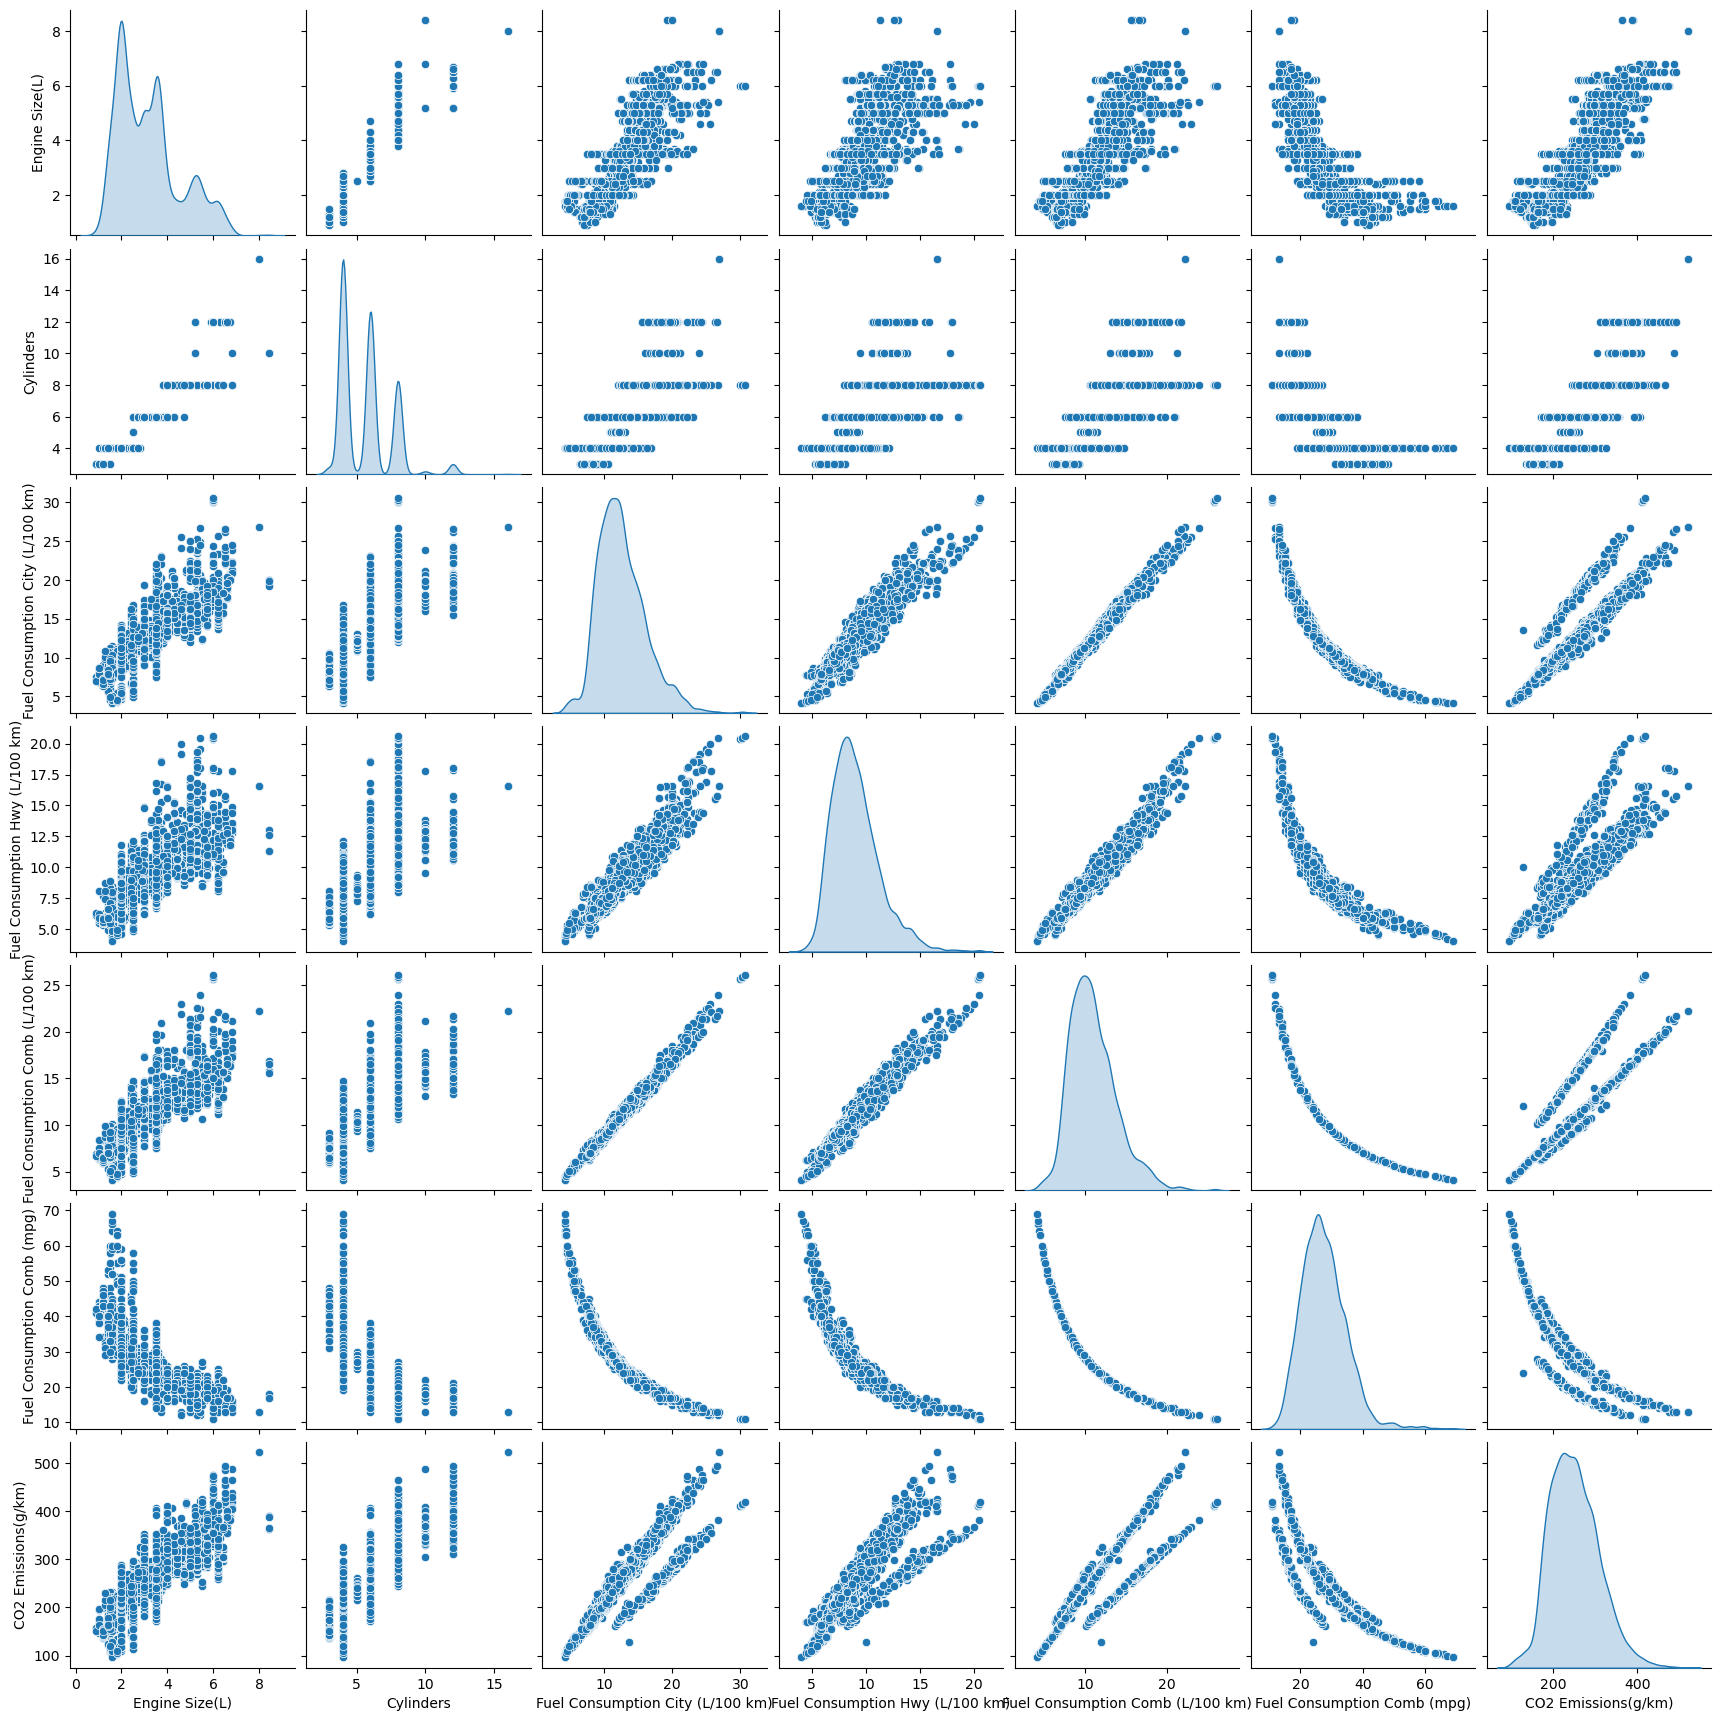

In [8]:

sns.pairplot(df.select_dtypes(include=['number']),diag_kind='kde')
plt.show()

In [9]:

# Step 5: Data Preprocessing
# Selecting features and target variable

#df['Engine Size(L)','Fuel Consumption City (L/100 km)'] # If try this, there will be key error
df[['Engine Size(L)','Fuel Consumption City (L/100 km)']]
x = df[['Engine Size(L)','Fuel Consumption City (L/100 km)']]
x
y=df['CO2 Emissions(g/km)']
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64

In [10]:

# Splitting the dataset

x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:

# Step 6: Model Training

model=LinearRegression()
model.fit(x_train,y_train) # x_train : Performs Feature Training
# and y_train: performs training the target variable

LinearRegression()

In [13]:

# Step 7: Model Prediction

y_pred=model.predict(x_test) # x_test : Performing prediction using Features from x_test dataset
y_pred


array([246.96818845, 320.05851726, 327.82330527, ..., 186.42531527,
       247.20932975, 202.80693664])

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:

# Step 8: Model Evaluation

mae = mean_absolute_error(y_test,y_pred) # mean absolute error
mse = mean_squared_error(y_test,y_pred) #mean squared error
rse = r2_score(y_test,y_pred) # r-squared error
print("mean absolute error:",mae)
print("mean squared error:",mse)
print("r-squared error:",rse)

mean absolute error: 14.139566553850123
mean squared error: 454.44107955122456
r-squared error: 0.8678807252113819


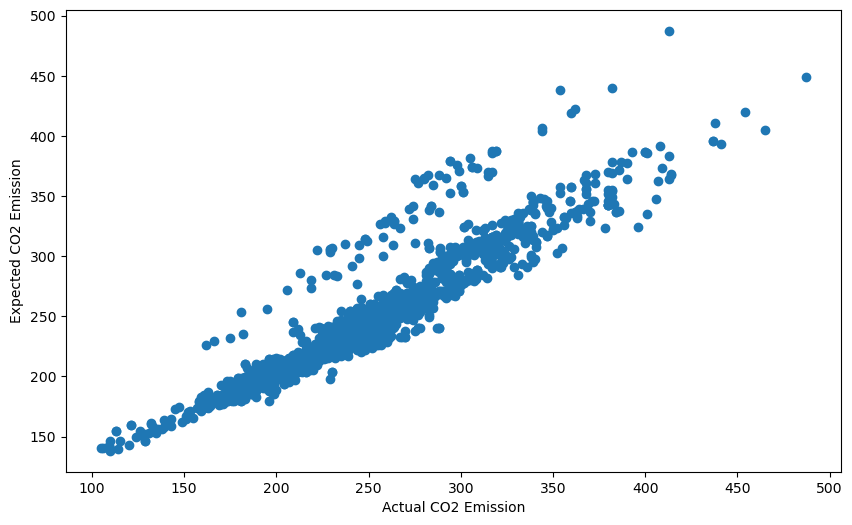

In [16]:

# Step 9: Visualization of Predictions

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual CO2 Emission")
plt.ylabel("Expected CO2 Emission")
plt.show()



#### Conclusion
- The regression model provides a way to predict CO₂ emissions based on vehicle attributes.
- Feature selection and data preprocessing are critical for model performance.
- Future improvements could include using different models (e.g., Random Forest, Decision Trees).



In [17]:
'''
Conclusion:
Predicted CO2 emission based on engine size and fuel consumption in city.
Feature selection and data preprocessing are crucial steps in model performance
'''

'\nConclusion:\nPredicted CO2 emission based on engine size and fuel consumption in city.\nFeature selection and data preprocessing are crucial steps in model performance\n'